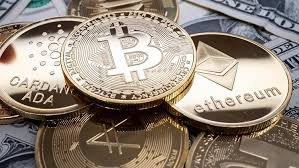

## Amaç:
BTC/USD paritesinin geçmiş fiyat verilerine bakarak gelecekteki fiyatlarını tahmin etmek.

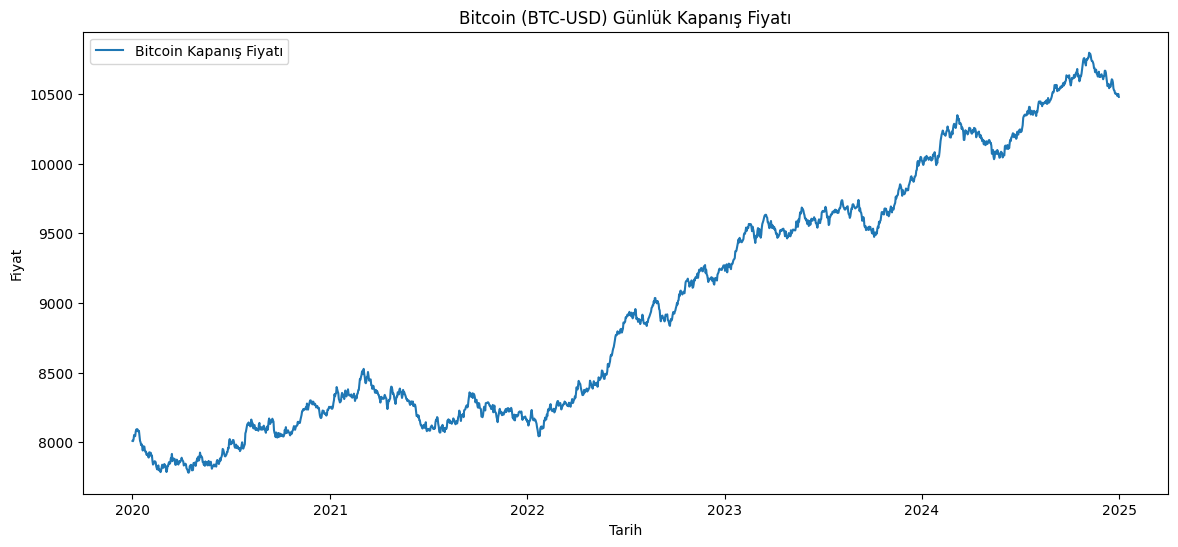

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BTC_USD_Sample_2020_2024.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Bitcoin Kapanış Fiyatı')
plt.title("Bitcoin (BTC-USD) Günlük Kapanış Fiyatı")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.show()


In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])


In [3]:
import numpy as np

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(100))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32, verbose=1)


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0479
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 2.6096e-04
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 2.2749e-04
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.1915e-04
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 2.2899e-04
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.1017e-04
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.0616e-04
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.0656e-04
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 1.9624e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.0987e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 1.9492e-04
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.0262e-04
Epoch 13/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.2917e-04
Epoch 14/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.8249e-04
Epoch 15/20
56/56 ━

In [5]:
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
true_prices = scaler.inverse_transform(y.reshape(-1, 1))


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step  


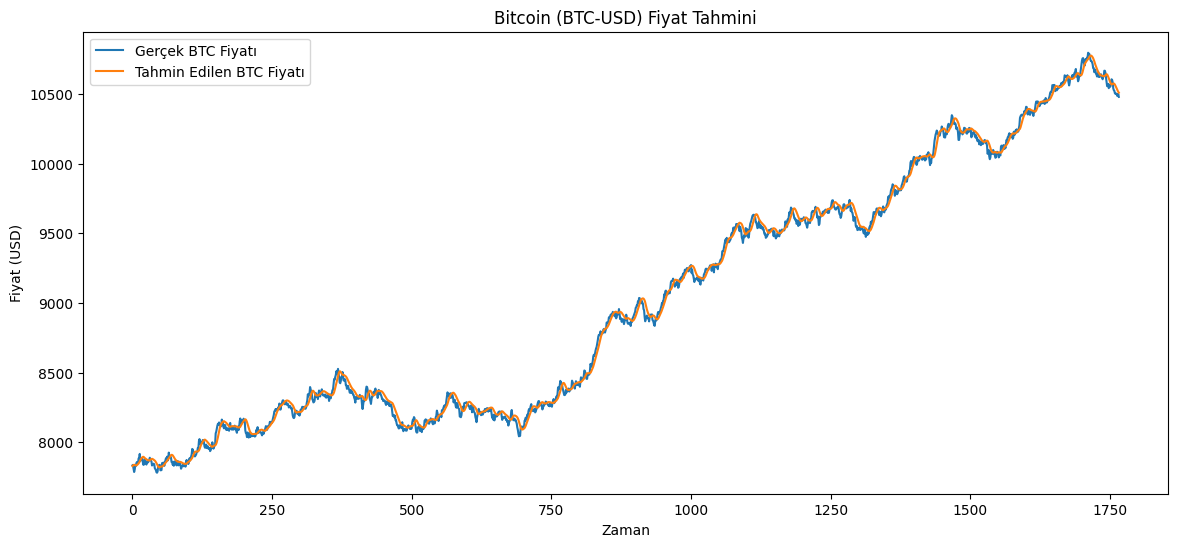

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(true_prices, label='Gerçek BTC Fiyatı')
plt.plot(predicted_prices, label='Tahmin Edilen BTC Fiyatı')
plt.title("Bitcoin (BTC-USD) Fiyat Tahmini")
plt.xlabel("Zaman")
plt.ylabel("Fiyat (USD)")
plt.legend()
plt.show()


### Gelecek Günleri Tahmin Etmek (Future Forecast)

In [7]:
# Son 60 gün verisini al
last_sequence = scaled_data[-time_step:].reshape(1, time_step, 1)

future_predictions = []

for _ in range(30):  # 30 gün tahmini
    next_price = model.predict(last_sequence)[0][0]
    future_predictions.append(next_price)

    # Yeni veriyi sıraya ekle
    last_sequence = np.append(last_sequence[:,1:,:], [[[next_price]]], axis=1)

# Ölçeği geri al
future_prices = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

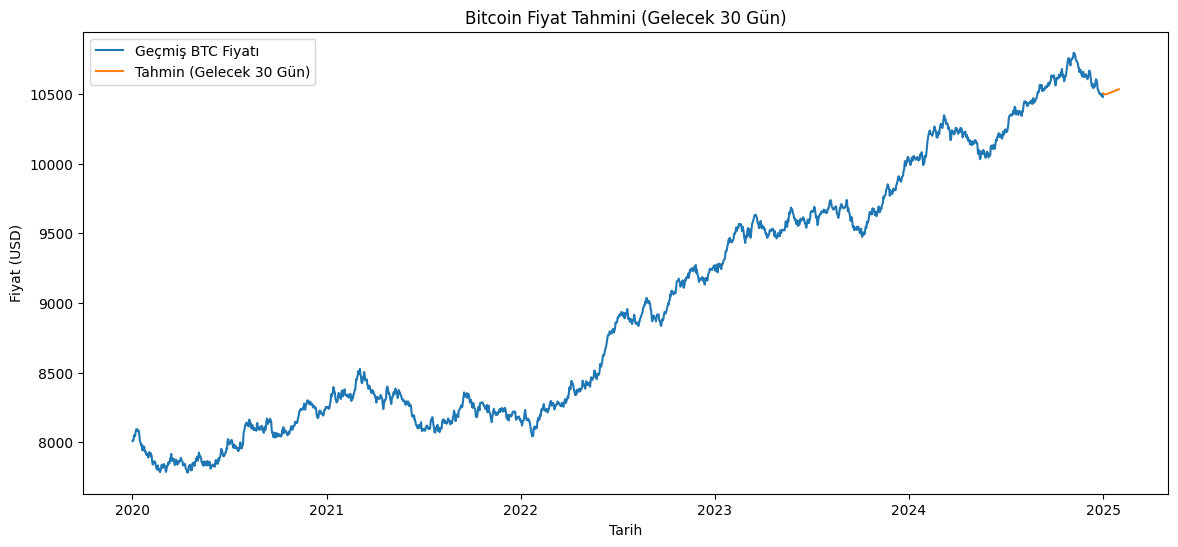

In [8]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Geçmiş BTC Fiyatı')
plt.plot(pd.date_range(df.index[-1], periods=31, freq='D')[1:], future_prices, label='Tahmin (Gelecek 30 Gün)')
plt.title("Bitcoin Fiyat Tahmini (Gelecek 30 Gün)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (USD)")
plt.legend()
plt.show()
